# Solving a Regression Problem using ANN

### Using California Housing Dataset

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load California Housing Dataset

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing()

In [5]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### In this dataset there are 8 Features and 1 Target column

In [6]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

### Get the independent and dependent Features in the dataframe

In [7]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y= pd.DataFrame(housing.target,columns=['Target'])

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
y.head()

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### Check the Null data

In [12]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [13]:
y.isnull().sum()

Target    0
dtype: int64

### Dividing the data into Training and Test 

In [14]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,random_state=42)

### Dividing the Training data set into Train and Validation 

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [17]:
print(f'Shape of X_train_full :- {X_train_full.shape}')
print(f'Shape of X_test :- {X_test.shape}')
print(f'Shape of X_train :- {X_train.shape}')
print(f'Shape of X_valid :- {X_valid.shape}')

Shape of X_train_full :- (15480, 8)
Shape of X_test :- (5160, 8)
Shape of X_train :- (11610, 8)
Shape of X_valid :- (3870, 8)


##  Architecture used

### Here I'm using 5 Layer Architecture to train the data in which there are 3 Hidden Layer 1 Input and 1 Output Laye 
#### There are 30 units 10 units and 5 units in Hidden Layer 1 , Hidden Layer 2 and Hidden Layer 3 respectively and 8 units(Independent featurs) in Input layer and 1 unit as a output in the Output Layer

In [19]:
X_train.shape[1:]

(8,)

In [20]:
LAYERS = [
            tf.keras.layers.Dense(30,activation='relu',input_shape = X_train.shape[1:]),
            tf.keras.layers.Dense(10,activation='relu'),
            tf.keras.layers.Dense(5,activation='relu'),
            tf.keras.layers.Dense(1)
]

## Using 'relu' as a activation function

### Define the model for LAYERS

In [21]:
model = tf.keras.models.Sequential(LAYERS)

#### Loss function -- mse (mean squared error)
#### Optimizer -- sgd (stochastic gradient descent)

In [22]:
LOSS = 'mse'
OPTIMIZER = 'sgd'

In [23]:
model.compile(optimizer=OPTIMIZER,loss=LOSS)

#### Summary of the model

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### We are gatting 641 Trainable Parameters for all the Layers

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#### Set the Epochs

In [27]:
EPOCHS = 20

In [28]:
histroy = model.fit(X_train,y_train, epochs=EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 0.6912 - val_loss: 0.8467
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4394 - val_loss: 0.3885
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4001 - val_loss: 0.5042
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3857 - val_loss: 0.4409
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3839 - val_loss: 0.4390
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3705 - val_loss: 0.3921
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3658 - val_loss: 0.3616
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3560 - val_loss: 0.3560
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3524 - val_loss: 0.3991
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3471 - val_loss: 0.3425

#### For each EPOCH LOSS and val_loss get reduced  
#### loss reduced from 0.6912 to 0.3245
#### val_loss reduced from  0.8467 to 0.3272 

### Get the History of the model

In [29]:
pd.DataFrame(histroy.history)

,loss,val_loss
0,0.691248,0.846653
1,0.439443,0.388518
2,0.400117,0.504193
3,0.385720,0.440871
4,0.383894,0.439037
5,0.370524,0.392085
6,0.365825,0.361567
7,0.355994,0.355987
8,0.352441,0.399104
9,0.347117,0.342493


<AxesSubplot:>

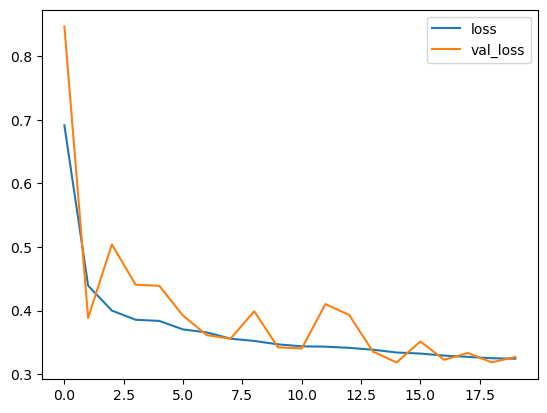

In [30]:
pd.DataFrame(histroy.history).plot()

#### Plot is showing how loss and val_loss get reduced for each EPOCHS

### Evaluate the model for test data

In [31]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3277


0.3277437388896942

#### For test data we are getting  loss of 0.3277

In [33]:
X_test.shape

(5160, 8)

### Chech the model for One data

In [34]:
new = X_test[0]

In [35]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [36]:
new.shape

(8,)

In [37]:
new.reshape((1,8)).shape

(1, 8)

### Predict

In [38]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 197ms/step


array([[0.7509191]], dtype=float32)

### We got the predicted value for the given input :- 0.75.9191